# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [36]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [37]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

597

In [39]:
# note to fugure self: check first 5
# cities[:5]

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [43]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# print(json.dumps(requests.get(query_url + cities[0]).json(), indent=3))

data = requests.get(query_url + cities[0]).json()

In [44]:
# note to future self, check keys:
# if curly brackets, use .keys to find the keys of interest
# data.keys()
# data['weather'][0]

In [46]:
# peek into data set
# print(json.dumps(data,indent=3))

In [33]:
# DF to store all cities and city number.  Note this requires citipy
city_df = pd.DataFrame({'City': cities})
print("Beginning Data Retrieval")
print("----------------------------")

# Target Url for API calls
query_url = "http://api.openweathermap.org/data/2.5/weather"

# Create add'l fields for api calls

city_df['Lat'] = ''
city_df['Lng'] = ''
city_df['Max Temp'] = ''
city_df['Humidity'] = ''
city_df['Cloudiness'] = ''
city_df['Wind Speed'] = ''
city_df['Country'] = ''
city_df['Date'] = ''

city_count = 0

# Loop through the API
for index,row in city_df.iterrows():

    city_name = row['City']
    
    # Set query parameters
    params = {'q': city_name,'units': 'imperial','appid': weather_api_key,}
    response = requests.get(query_url, params = params).json()
    
    try:
       
        city_df.loc[index, 'Lat'] = response['coord']['lat']
        city_df.loc[index, 'Lng'] = response['coord']['lon']
        city_df.loc[index, 'Max Temp'] = response['main']['temp_max']
        city_df.loc[index, 'Humidity'] = response['main']['humidity']
        city_df.loc[index, 'Cloudiness'] = response['clouds']['all']
        city_df.loc[index, 'Wind Speed'] = response['wind']['speed']
        city_df.loc[index, 'Country'] = response['sys']['country']
        city_df.loc[index, 'Date'] = response['dt']
        
        # Update city number
        city_count += 1
        
        # Print each city name and number as processingessed (only if all data is available)
        print(f'Processing Record {city_count} | {city_name}')
        
    except (KeyError, IndexError):

        print("City not found. Skipping...")


print("----------------------------")
print("Data Retrieval Complete")
print("----------------------------")

Beginning Data Retrieval
----------------------------
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skippi

City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skip

City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
----------------------------
Data Retrieval Complete
----------------------------


In [8]:
city_df.count()

City          603
Lat           603
Lng           603
Max Temp      603
Humidity      603
Cloudiness    603
Wind Speed    603
Country       603
Date          603
dtype: int64

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
## dataframe was created in previous cell.
# export to csv and display
city_df.to_csv('city_df_export.csv', encoding = 'utf-8', index = False)
city_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,cape town,,,,,,,,
1,attawapiskat,,,,,,,,
2,warqla,,,,,,,,
3,cherskiy,,,,,,,,
4,usevya,,,,,,,,


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [10]:
# Inspect data first and remove rows with null fields, etc.
city_df.replace('',np.nan,inplace = True)
city_df = city_df.dropna()

In [11]:
# test if any cities have humidity over 100%
# this shows the highest humidity
city_df['Humidity'].max()

nan

In [12]:
# ## note to future self.  Below are two additional ways of listing the cities with the hightest humidities

# # This shows the highest 20 humidities.  None above 100
# city_df.sort_values(by=['Humidity'],ascending=False).head(20)

# # another way of showing the top 15 cities cities with the highest humidity
# city_df.nlargest(15,['Humidity'])

From the above cell, there are no cities with humidity above 100. The max humidity is 100

In [13]:
#  Get the indices of cities that have humidity over 100%.
#  This is not an applicable question as there are not ciites with humidity over 100%

In [14]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
# The above instructions are not applicable as there are no cities with humidity over 100

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

This graph provides a visual analysis of max temps across latitudes
Due to the concentration of dots, there appears to be a correlation of max temp to latitude


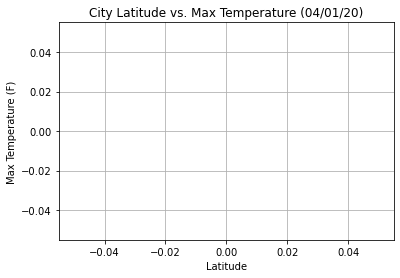

In [15]:
plt.scatter(city_df['Lat'],city_df['Max Temp'], c = 'r', edgecolor = 'k')
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title(f'City Latitude vs. Max Temperature (04/01/20)')
print("This graph provides a visual analysis of max temps across latitudes")
print("Due to the concentration of dots, there appears to be a correlation of max temp to latitude")

## Latitude vs. Humidity Plot

This graph provides a visual analysis of humidity across latitudes
The dots are relatively scattered across the graph but there is a higher concentration across the upper right (e.g. higher humidity associated with higher latitude). However this correlcation seems very weak.


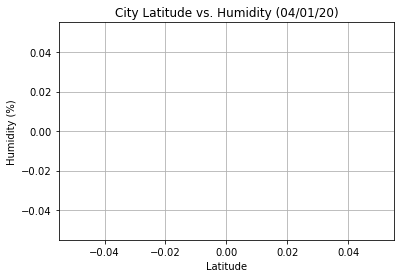

In [16]:
plt.scatter(city_df['Lat'],city_df['Humidity'], c = 'blue', edgecolor = 'k')
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'City Latitude vs. Humidity (04/01/20)')
print("This graph provides a visual analysis of humidity across latitudes")
print("The dots are relatively scattered across the graph but there is a higher concentration across the upper right (e.g. higher humidity associated with higher latitude). However this correlcation seems very weak.")

## Latitude vs. Cloudiness Plot

This graph provides a visual analysis of cloudiness across latitudes
There does not appear to be an obvious correlation between latitude and cloudiness


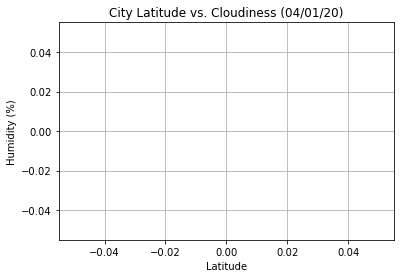

In [17]:
plt.scatter(city_df['Lat'],city_df['Cloudiness'], c = 'grey', edgecolor = 'k')
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'City Latitude vs. Cloudiness (04/01/20)')
print("This graph provides a visual analysis of cloudiness across latitudes")
print("There does not appear to be an obvious correlation between latitude and cloudiness")

## Latitude vs. Wind Speed Plot

This graph provides a visual analysis of windspeed across latitudes
There does not appear to be an obvious correlation between latitude and wind speed
However, there are a few outlier speeds above 30 mph and the majoriy are 20 mph or under.


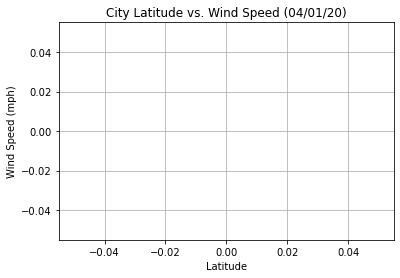

In [18]:
plt.scatter(city_df['Lat'],city_df['Wind Speed'], c = 'green', edgecolor = 'k')
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f'City Latitude vs. Wind Speed (04/01/20)')
print("This graph provides a visual analysis of windspeed across latitudes")
print("There does not appear to be an obvious correlation between latitude and wind speed")
print("However, there are a few outlier speeds above 30 mph and the majoriy are 20 mph or under.")

## Linear Regression

## Note to graders: below graph colors were selected to match the above generated graphs

### Northern Hemisphere - Max Temp vs. Latitude Linear Regression

ValueError: Inputs must not be empty.

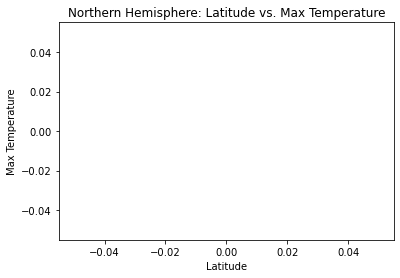

In [19]:
north_temp_df = city_df.loc[city_df['Lat']>=0]
plt.scatter(north_temp_df['Lat'],north_temp_df['Max Temp'], c = 'r', edgecolor = 'k')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.title(f'Northern Hemisphere: Latitude vs. Max Temperature')

# Regression Analysis
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_temp_df['Lat'],north_temp_df['Max Temp'])
regress_values = north_temp_df['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(north_temp_df['Lat'],regress_values)
plt.annotate(line_eq,(5,-30),fontsize=12,color="black")
print(f"The r-value is: {round(rvalue**2,2)}")

#### In the above graph, the r value is in the 'Strong' category which indicates strong correlation between latitude and max temperature in the northern hemisphere.  This is also seen based on the concentration of dots to the regression line.

### Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [ ]:
south_temp_df = city_df.loc[city_df['Lat']<0]
plt.scatter(south_temp_df['Lat'],south_temp_df['Max Temp'], c = 'r', edgecolor = 'k')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.title(f'Southern Hemisphere: Latitude vs. Max Temperature')

# Regression Analysis
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_temp_df['Lat'],south_temp_df['Max Temp'])
regress_values = south_temp_df['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(south_temp_df['Lat'],regress_values)
plt.annotate(line_eq,(-55,95),fontsize=12,color="black")
print(f"The r-value is: {round(rvalue**2,2)}")
# note to graders - the dot color was selected as red to match the above temp graph.  Therefore regression line color is contrasting

#### In the above graph, the r value is in the 'weak' category which indicates there is not much of a correlation beetween latitude and max temperature in the southern hemisphere.  This is also apparent ith the concentration of dots around the regression line

###  Northern Hemisphere - Humidity vs. Latitude Linear Regression

In [ ]:
north_hum_df = city_df.loc[city_df['Lat']>=0]
plt.scatter(north_hum_df['Lat'],north_hum_df['Humidity'], c = 'blue', edgecolor = 'k')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title(f'Northern Hemisphere: Latitude vs. Humidity')

# Regression Analysis
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_hum_df['Lat'],north_hum_df['Humidity'])
regress_values = north_hum_df['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(north_hum_df['Lat'],regress_values)
plt.annotate(line_eq,(50,10),fontsize=12,color="black")
print(f"The r-value is: {round(rvalue**2,2)}")

#### In the above graph, the r value is in the 'very week or non existent' category which indicates there is no correlation beetween latitude and humidity in the northern hemisphere.  This is also apparent ith the scattering of dots around the regression line.

####  Southern Hemisphere - Humidity vs. Latitude Linear Regression

In [ ]:
south_hum_df = city_df.loc[city_df['Lat']<0]
plt.scatter(south_hum_df['Lat'],south_hum_df['Humidity'], c = 'blue', edgecolor = 'k')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title(f'Southern Hemisphere: Latitude vs. Humidity')

# Regression Analysis
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_hum_df['Lat'],south_hum_df['Humidity'])
regress_values = south_hum_df['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(south_hum_df['Lat'],regress_values)
plt.annotate(line_eq,(50,10),fontsize=12,color="black")
print(f"The r-value is: {round(rvalue**2,2)}")

#### In the above graph, the r value is in the 'very week or non existent' category which indicates there is no correlation beetween latitiude and humidity in the southern hemisphere.  In fact the r value is even less than that of the northern hemisphere. This is also apparent ith the scattering of dots around the regression line.

###  Northern Hemisphere - Coudiness vs. Latitude Linear Regression

In [ ]:
north_cloud_df = city_df.loc[city_df['Lat']>=0]
plt.scatter(north_temp_df['Lat'],north_cloud_df['Cloudiness'], c = 'grey', edgecolor = 'k')
plt.xlabel('Latitude')
plt.ylabel('Coudiness')
plt.title(f'Northern Hemisphere: Latitude vs. Cloudiness')

# Regression Analysis
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_cloud_df['Lat'],north_cloud_df['Cloudiness'])
regress_values = north_cloud_df['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(north_cloud_df['Lat'],regress_values)
plt.annotate(line_eq,(50,10),fontsize=12,color="black")
print(f"The r-value is: {round(rvalue**2,2)}")

#### In the above graph, the r value is in the 'non existent' category which indicates there is no correlation beetween latitude and cloudiness in the northern hemisphere.  If anything, the cloudiness would be more likely correlated on amount of cloudiness and not corresponding to latitude.

####  Southern Hemisphere - Coudiness vs. Latitude Linear Regression

In [ ]:
south_cloud_df = city_df.loc[city_df['Lat']<0]
plt.scatter(south_cloud_df['Lat'],south_cloud_df['Cloudiness'], c = 'grey', edgecolor = 'k')
plt.xlabel('Latitude')
plt.ylabel('Coudiness')
plt.title(f'Southern Hemisphere: Latitude vs. Cloudiness')

# Regression Analysis
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_cloud_df['Lat'],south_cloud_df['Cloudiness'])
regress_values = south_cloud_df['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(south_cloud_df['Lat'],regress_values)
plt.annotate(line_eq,(50,10),fontsize=12,color="black")
print(f"The r-value is: {round(rvalue**2,2)}")

#### In the above graph, the r value is in the 'non existent' category which indicates there is no correlation beetween latitude and cloudiness in the sourthern hemisphere. Based on the scattering of dots to regression line, there is no correlation.

###  Northern Hemisphere - Wind speed vs. Latitude Linear Regression

In [ ]:
north_wind_df = city_df.loc[city_df['Lat']>=0]
plt.scatter(north_temp_df['Lat'],north_wind_df['Wind Speed'], c = 'green', edgecolor = 'k')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f'Northern Hemisphere: Latitude vs. Wind Speed')

# Regression Analysis
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_wind_df['Lat'],north_wind_df['Wind Speed'])
regress_values = north_wind_df['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(north_wind_df['Lat'],regress_values)
plt.annotate(line_eq,(5,40),fontsize=12,color="black")
print(f"The r-value is: {round(rvalue**2,2)}")

#### In the above graph, the r value is in the 'non existent' category which indicates there is no correlation beetween latitude and wind speed in the northern hemisphere. If anything, it would be a better study to compare cloudiness to wind speed.

###  Southern Hemisphere - Wind speed vs. Latitude Linear Regression

In [ ]:
south_wind_df = city_df.loc[city_df['Lat']<0]
plt.scatter(south_wind_df['Lat'],south_wind_df['Wind Speed'], c = 'green', edgecolor = 'k')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f'Southern Hemisphere: Latitude vs. Wind Speed')

# Regression Analysis
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_wind_df['Lat'],south_wind_df['Wind Speed'])
regress_values = south_wind_df['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(south_wind_df['Lat'],regress_values)
plt.annotate(line_eq,(-55,27),fontsize=12,color="black")
print(f"The r-value is: {round(rvalue**2,2)}")

#### In the above graph, the r value is in the 'weak' category which indicates there is no correlation beetween latitude and wind speed in the southern hemisphere.